In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xarray as xr
import warnings
warnings.filterwarnings('ignore')

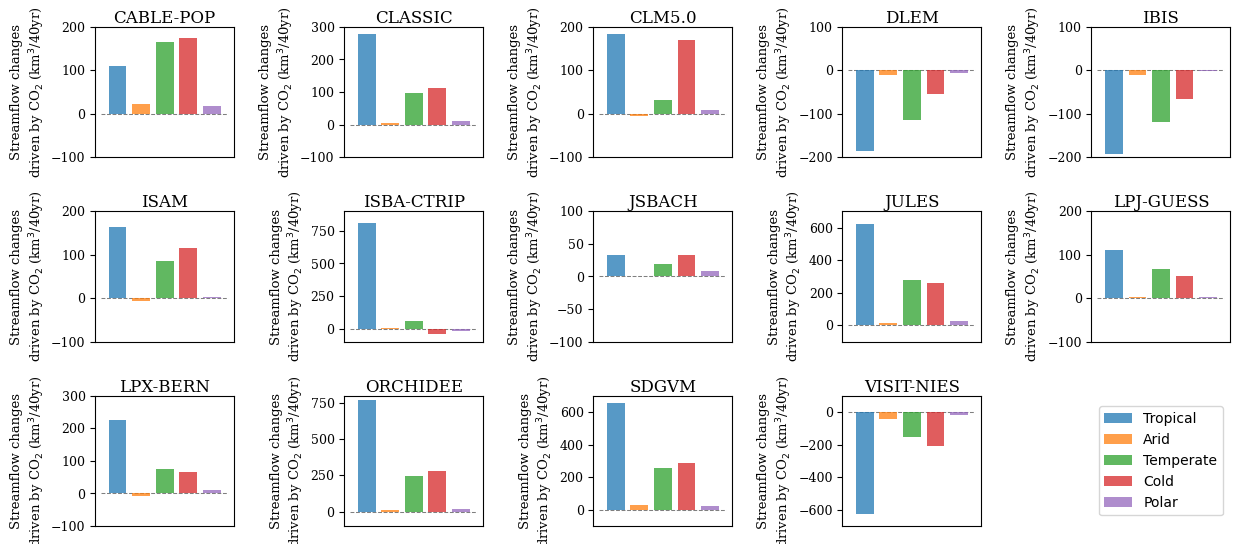

In [2]:
# Calculating the area of each grid
def cal_area():
    lon = [-180+0.5*i for i in range(721)]
    lat = [-90 + 0.5 * i for i in range(361)]
    R = 6371.393
    data = np.zeros((360, 720))
    for i in range(720):
        for j in range(360):
            area = (np.pi/180) * (R**2) * abs(np.sin(lat[j]/180*np.pi) - np.sin(lat[j+1]/180*np.pi)) * abs(lon[i]-lon[i+1])
            data[j, i] = area
    return data

# Plotting Figure S1
def Figure_S1():
    data = xr.open_dataset(r"dataset\CO2_trend.nc")
    con = xr.open_dataset(r"dataset\Beck_KG_5_classifications.nc")
    con = con.data[:]
    co2 = data.CO2.data[:] * 40
    d = cal_area()
    lat_runoff = np.zeros((1, 5))
    fig = plt.figure(figsize=(2.5*5, 2.6*2.1))
    trendy_name = ['CABLE-POP', 'CLASSIC', 'CLM5.0', 'DLEM', 'IBIS', 'ISAM',
                   'ISBA-CTRIP', 'JSBACH', 'JULES', 'LPJ-GUESS', 'LPX-BERN', 'ORCHIDEE',
                   'SDGVM', 'VISIT-NIES', 'VISIT']

    for k in range(14):
        d_here = co2[k, :] * d / 1000000
        for j in range(5):
            lat_runoff[0, j] = np.nansum(d_here[con == j + 1])
        y = np.ravel(lat_runoff)

        ax = fig.add_subplot(3, 5 ,k+1)
        ax.set_title(trendy_name[k], fontsize=12,
                 fontfamily='serif', va='top', ha='center')
        ax.plot([0.3, 5.7], [0, 0], 'k--', zorder=0, alpha=0.5, linewidth=0.75)
        ax.plot([-10, -10], [0, 0], 'k-', zorder=0, alpha=1, linewidth=0.75, label='1 std')
        plt.bar(x=[1, 2, 3, 4, 5], height=y, width=0.75,
                alpha=0.75, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'],
                error_kw={'linewidth': 0.75}, label=['Tropical', 'Arid', 'Temperate', 'Cold', 'Polar'])

        plt.xlim([0.05, 5.95])
        ymin = (int(np.min(y) / 100) - 1) * 100
        ymax = (int(np.max(y) / 100) + 1) * 100
        plt.ylim([ymin, ymax])
        plt.yticks(family='serif', fontsize=9)
        plt.xticks([], [])
        plt.ylabel('Streamflow changes\ndriven by CO$_2$ (km$^3$/40yr)', family='serif',
                   fontsize=9.5, loc='center')
    ax = fig.add_subplot(3, 5, 15)
    ax.axis('off')
    ax.bar(x=[1, 2, 3, 4, 5], height=0, width=0.75, alpha=0.75,
            color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'],
            error_kw={'linewidth': 0.75}, label=['Tropical', 'Arid', 'Temperate', 'Cold', 'Polar'])
    plt.legend(loc='center')
    plt.xlim([0.05, 5.95])
    plt.tight_layout()
    plt.subplots_adjust(
        top=0.956,
        bottom=0.042,
        left=0.08,
        right=0.988,
        hspace=0.417,
        wspace=0.794)
    plt.rcParams['savefig.dpi'] = 1000
    plt.show()
Figure_S1()